In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/raw-counts/GSM5226574_C51ctr_raw_counts.csv
/kaggle/input/rawcounts/GSM5226574_C51ctr_raw_counts.csv


In [2]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=e9bb887d98180adf26af4cfd45a696ceb010a930a3a3f025b4faebad6a427524
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


In [3]:
!pip install --user scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 80.6 MB/s eta 0:00:00:00:01:01


In [4]:
!pip install scvi-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19878 sha256=c448e9bba411ebabae608f803b606489aa1a529e60022965aa76dc31585ee7c2
  Stored in directory: /root/.cache/pip/wheels/c3/64/48/03c38d8d906159eaa210b3c548fdb590eb3e2a4a5745ae2172
  Created wheel for ml-collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94507 sha2

In [56]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00a 0:00:01


# ANALYSIS START

In [5]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
adata = sc.read_csv("/kaggle/input/raw-counts/GSM5226574_C51ctr_raw_counts.csv").T

In [7]:
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [8]:
sc.pp.filter_genes(adata, min_cells = 10)

In [9]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

# Data Cleaning

## Predicting Doublets with an scvi model

In [10]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [02:22<00:00,  2.91it/s, v_num=1, train_loss_step=335, train_loss_epoch=322]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [02:22<00:00,  2.81it/s, v_num=1, train_loss_step=335, train_loss_epoch=322]


In [11]:
# training the predict model
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Epoch 141/400:  35%|███▌      | 141/400 [00:57<01:45,  2.45it/s, v_num=1, train_loss_step=0.395, train_loss_epoch=0.296]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.277. Signaling Trainer to stop.


In [12]:
solo.predict()

,doublet,singlet
TAGGTACCATGGCCAC-1_1,1.078878,-1.290583
ATTCACTGTAACAGGC-1_1,1.146487,-1.451887
TAACTTCCAACCACGC-1_1,1.035748,-0.925145
TTGGGTACACGACAAG-1_1,1.097419,-0.953793
AGGCCACAGAGTCACG-1_1,0.735004,-0.876003
...,...,...
CGCCATTGTTTGCCGG-1_1,-1.262210,1.439580
CACTGGGGTCTACGTA-1_1,-2.276704,2.710072
CATACTTGTAGAGGAA-1_1,-2.701815,2.609242
TTTGGTTTCCACGGAC-1_1,-2.869419,2.830722


In [13]:
# PREDICT DOUBLETS with the model
df = solo.predict()
df['prediction'] = solo.predict(soft = False) #soft = Fals: to make a new col , the predicted label

# delete the last two chats "_0" of indices, added by scvi
df.index = df.index.map(lambda x: x[:-2])


In [14]:
df

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1,1.078878,-1.290583,doublet
ATTCACTGTAACAGGC-1,1.146487,-1.451887,doublet
TAACTTCCAACCACGC-1,1.035748,-0.925145,doublet
TTGGGTACACGACAAG-1,1.097419,-0.953793,doublet
AGGCCACAGAGTCACG-1,0.735004,-0.876003,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1,-1.262210,1.439580,singlet
CACTGGGGTCTACGTA-1,-2.276704,2.710072,singlet
CATACTTGTAGAGGAA-1,-2.701815,2.609242,singlet
TTTGGTTTCCACGGAC-1,-2.869419,2.830722,singlet


In [15]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1225,1225
singlet,4874,4874


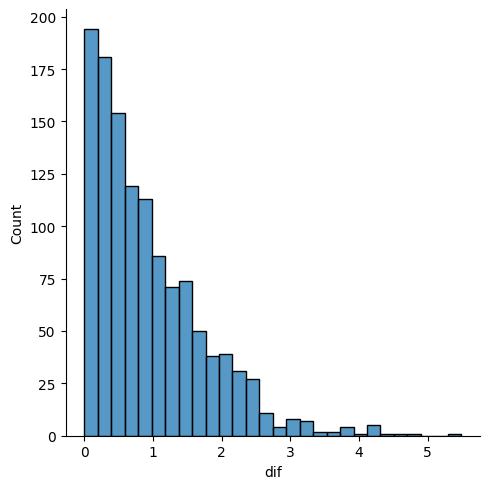

In [16]:
df['dif'] = df.doublet - df.singlet
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [17]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
TAGGTACCATGGCCAC-1,1.078878,-1.290583,doublet,2.369461
ATTCACTGTAACAGGC-1,1.146487,-1.451887,doublet,2.598374
TAACTTCCAACCACGC-1,1.035748,-0.925145,doublet,1.960893
TTGGGTACACGACAAG-1,1.097419,-0.953793,doublet,2.051212
AGGCCACAGAGTCACG-1,0.735004,-0.876003,doublet,1.611007
...,...,...,...,...
ATCATTCCAACCACGC-1,0.367552,-0.692738,doublet,1.060290
TTGCTGCAGTGCGACA-1,0.691588,-0.655041,doublet,1.346628
GTAGAGGTCACACGAT-1,0.590568,-0.872442,doublet,1.463010
GGAGGTAGTTAAGCAA-1,0.549738,-0.585716,doublet,1.135454


In [20]:
adata = sc.read_csv("/kaggle/input/raw-counts/GSM5226574_C51ctr_raw_counts.csv").T
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs


,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [22]:
# lets filter out
adata = adata[~adata.obs.doublet]


In [23]:
adata

View of AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

# Pre-processing

In [25]:
# MITOCHONDRIAN GENES:
adata.var['mt'] = adata.var.index.str.startswith('MT-')
adata.var


/tmp/ipykernel_34/2130199849.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [26]:
# RIBOSOMIAL GENES
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [27]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.obs


,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,False
AGGCCACAGAGTCACG-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [28]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)


In [29]:
adata.var.sort_values('n_cells_by_counts')


,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AP003550.1,False,False,0,0.000000,100.000000,0.0
AC105177.1,False,False,0,0.000000,100.000000,0.0
AL353732.1,False,False,0,0.000000,100.000000,0.0
LINC02665,False,False,0,0.000000,100.000000,0.0
AC013799.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [30]:
sc.pp.filter_genes(adata, min_cells=3)


In [31]:
adata.obs.sort_values('n_genes_by_counts')


,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,False,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,False,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,False,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,False,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,False,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,False,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,False,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,False,6686,19020.0,404.0,2.124080,115.0,0.604627


KeyboardInterrupt: 

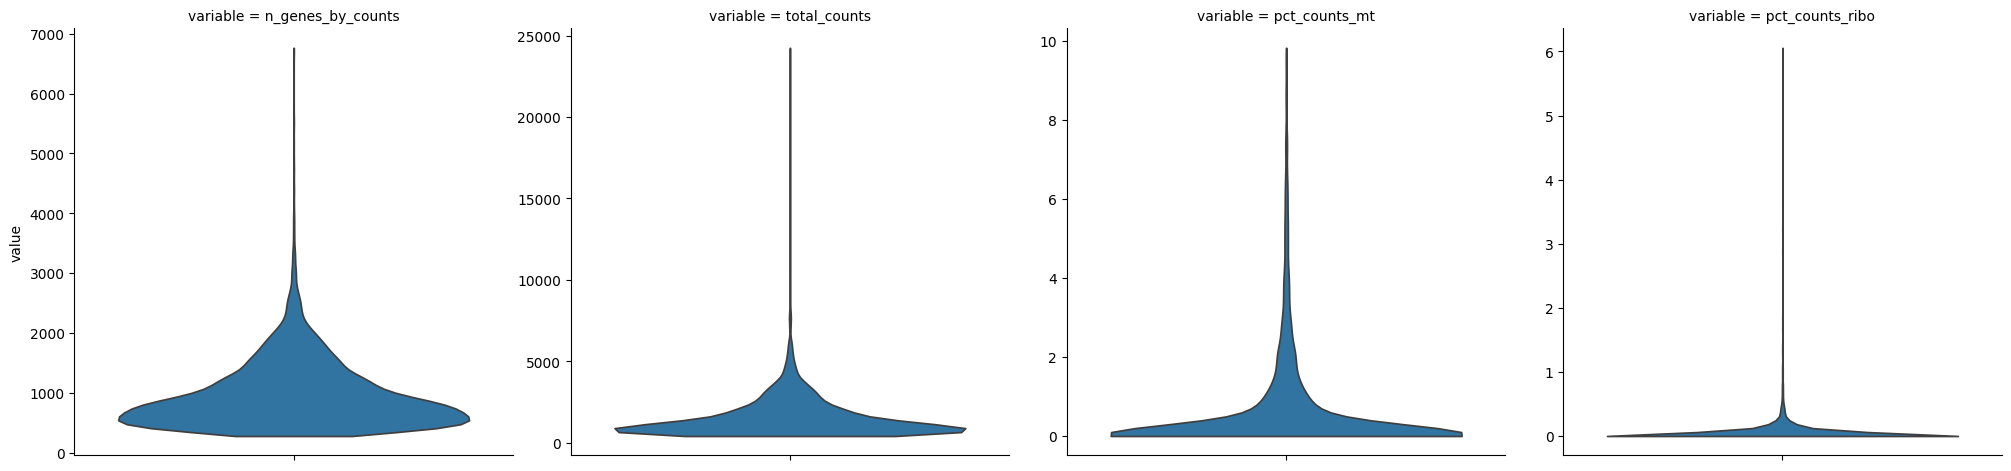

In [32]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [35]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)

In [36]:
upper_lim


2479.08

In [37]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]


In [38]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,False,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,False,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,False,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,False,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827


In [39]:
adata = adata[adata.obs.pct_counts_mt < 20]


In [40]:
adata = adata[adata.obs.pct_counts_ribo < 20]


In [41]:
adata

View of AnnData object with n_obs × n_vars = 5977 × 24660
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# NORMALIZATION Process

In [ ]:
adata.X.sum(axis = 1)


In [43]:
# normalize every cell to 10,000 UMI
sc.pp.normalize_total(adata, target_sum=1e4) 

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [44]:
adata.X.sum(axis = 1)


array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [45]:
# change to log counts
sc.pp.log1p(adata)


In [46]:
adata.X.sum(axis = 1)


array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [48]:
# SAVE raw data
adata.raw = adata


# CLUSTERING

In [49]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)


In [50]:
adata.var


,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011104,2.697176,1.140481
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028774,2.254617,-0.158362
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002324,1.702855,-1.777699
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.269804,2.286909,-0.063591
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006663,1.947492,-1.059725
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153568,2.375850,0.197440
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.873565,2.469722,-0.402960
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.149872,2.265941,-0.125128
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002793,1.579831,-2.138755


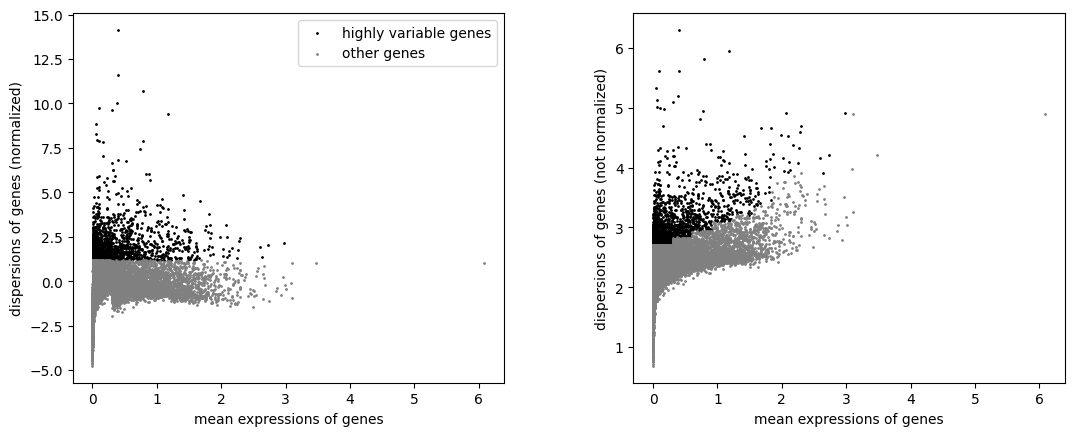

In [51]:
sc.pl.highly_variable_genes(adata)


In [52]:
adata = adata[:, adata.var.highly_variable]


In [53]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])


/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


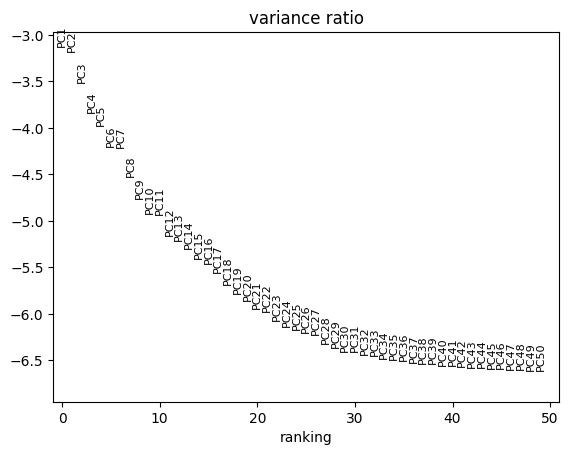

In [54]:
#  * Normalize each gene to the unit variance of that gene
sc.pp.scale(adata, max_value=10)

#    *  Run PRINCIPAL COMPONENT ANALYSIS 
#       to futher reduce dimenstions of  data
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


2024-04-17 16:36:52.177316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 16:36:52.177419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 16:36:52.299929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


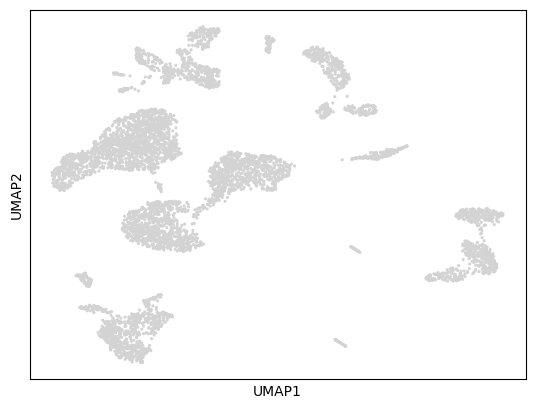

In [55]:
#  Picking 30, as the graph flattens out from 30 on
sc.pp.neighbors(adata, n_pcs = 30)

#   UMAP: Project the 30 dimensions into 2 dimensions
sc.tl.umap(adata)
sc.pl.umap(adata)


In [64]:
# Leiden-Algorithm :  To assign cluster (colors)

sc.tl.leiden(adata, resolution = 0.5)

/tmp/ipykernel_34/4037403061.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


In [65]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,False,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,False,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,False,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,False,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,False,299,405.0,0.0,0.000000,2.0,0.493827,12


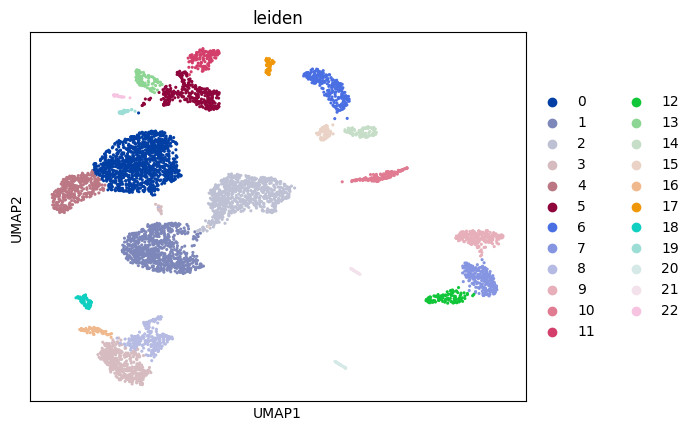

In [66]:
sc.pl.umap(adata, color=['leiden'])